In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.integrate as si
import numpy.linalg as npla

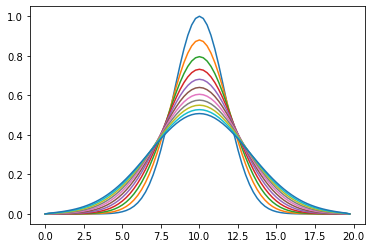

In [15]:
#this is my 2nd attempt at crank with the 1D heat equation

#variables
L=20
t0=0
tmax=2
x0=0
xmax=L
isteps=4*L
nsteps=10
dt=0.001
dx=xmax/isteps
k=L**2
r=(k*dt)/(2*(dx)**2)
sigma=L/12
x=np.zeros(isteps+1)

for i in range(isteps):
    xi=x0+(i+1)*dx
    x[i+1]=xi
    
T=np.zeros(isteps)

for i in range(1,isteps):#gives first array of T vs x
    xi=x0+(i)*dx
    Ti=np.exp((-1/2)*((xi-(L/2))**2)/(sigma)**2)
    T[i]=Ti

#make array of arrays of T
Tn=[]
Tn.append(T)

def CrankNicolson(T):#NEED TO FINISH WRITING THIS put in the inverse matrix
    a=-r
    b=(1+2*r)
    c=-r#these are also correct for the LHS
    RHS=np.zeros(isteps)
    for i in range(1,isteps-1):
        RHS[i]=r*T[i+1]+(1-2*r)*T[i]+r*T[i-1]#this is correct
    RHS[0]=r*T[1]
    RHS[isteps-1]=r*T[isteps-2]
    D=np.matrix(RHS).T#made matrix and made it vertical
    def tridiag(A, B, C, k1=-1, k2=0, k3=1):#tridiagonal matrix
        return np.diag(A, k1) + np.diag(B, k2) + np.diag(C, k3)
    A=[a]*(isteps-1); B = [b]*(isteps); C = [c]*(isteps-1)
    d=tridiag(A, B, C)
    I=npla.inv(d)#inverse matrix... this might be the issue..?
    T1=I*D
    T1=np.array(T1.T)[0]
    T1[0]=0
    T1[-1]=0
    return T1

plt.plot(x[0:isteps],T)

for n in range(nsteps):#run crank for all t and plot for each
    T=CrankNicolson(T)
    Tn.append(T)
    plt.plot(x[0:isteps],T)


plt.show()

In [4]:
#this is me figuring out how to make a matrix...
nsteps=5
A=np.zeros((nsteps,nsteps))
A[0:3]=[2]*1

print(A)

[[2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


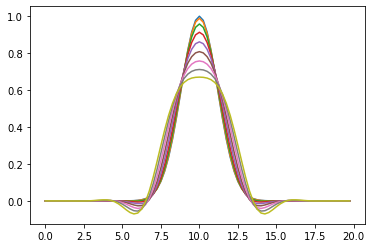

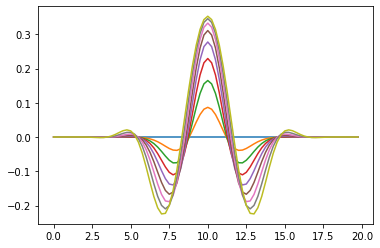

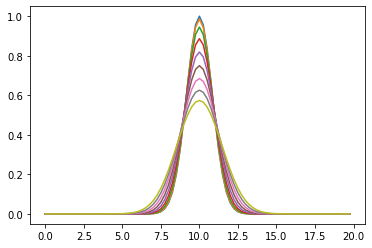

In [7]:
#this is my 2nd attempt at crank with the 1D heat equation

#variables
L=20
t0=0
tmax=2
x0=0
xmax=L
isteps=4*L
nsteps=8
dt=0.25
dx=xmax/isteps
k=1j
r=(dt)/(4*k*(dx)**2)
sigma=L/12
x=np.zeros(isteps+1)

for i in range(isteps):
    xi=x0+(i+1)*dx
    x[i+1]=xi
    
T=np.zeros(isteps,np.complex)

for i in range(1,isteps):#gives first array of T vs x
    xi=x0+(i)*dx
    Ti=np.exp((-1)*((xi-(L/2))**2)/(sigma)**2)
    T[i]=Ti


#make array of arrays of T
Tn=[]
Tn.append(T)


def CrankNicolson(T):#NEED TO FINISH WRITING THIS put in the inverse matrix
    a=-r
    b=(1+2*r)
    c=-r
    RHS=np.zeros(isteps,np.complex)
    for i in range(1,isteps-1):
        RHS[i]=r*T[i+1]+(1-2*r)*T[i]+r*T[i-1]
    RHS[0]=r*T[1]
    RHS[isteps-1]=r*T[isteps-2]
    D=np.matrix(RHS).T#made matrix for the RHS
    def tridiag(A, B, C, k1=-1, k2=0, k3=1):#tridiagonal matrix
        return np.diag(A, k1) + np.diag(B, k2) + np.diag(C, k3)
    A=[a]*(isteps-1); B = [b]*(isteps); C = [c]*(isteps-1)
    d=tridiag(A, B, C)
    I=npla.inv(d)#inverse matrix... this might be the issue..?
    T1=I*D
    T1=np.array(T1.T)[0]
    T1[0]=0
    T1[-1]=0
    return T1

plt.plot(x[0:isteps],np.real(T))# plots initial condition

for n in range(nsteps):#run crank for all t and plot for each plots real parts
    T=CrankNicolson(T)
    Tn.append(T)
    plt.plot(x[0:isteps],np.real(T))
    

plt.show()

for T in Tn:#Plots imaginary parts
    plt.plot(x[0:isteps],np.imag(T))

plt.show()

for T in Tn:#plots overall average
    plt.plot(x[0:isteps],np.abs(T)**2)
    
plt.show()